# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# Plot Parameters

In [2]:
plt.style.use('./custom_dark_bg.mplstyle')

# Stimulation Parameters

In [3]:
PRF = 33 # Hz
PRP = 1 / PRF # s
burst_duration = 250e-6 # s
carrier_freqs = np.array([20e3, 22e3]) # Hz
carrier_amplitudes = np.array([1e-3, 1e-3]) # A

In [4]:
N = 20000000
stop = 20
t = np.linspace(start=0, stop=stop, num=N).reshape(-1, 1) # s
t_local = t % PRP
bursts = (t_local) < burst_duration
signals = carrier_amplitudes * np.sin(2 * np.pi * carrier_freqs * t_local)

In [5]:
t.shape, bursts.shape, carrier_freqs.shape, carrier_amplitudes.shape

((20000000, 1), (20000000, 1), (2,), (2,))

Text(0.5, 1.0, 'Burst Times (over 2 cycles)')

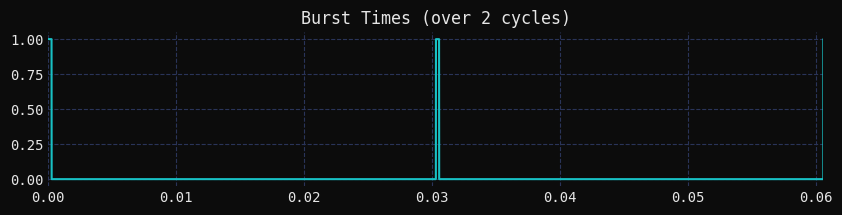

In [6]:
fig, ax = plt.subplots(figsize=(10, 2))
ax.plot(t, bursts * 1)
ax.set_xlim(0, 2/33)
ax.set_title('Burst Times (over 2 cycles)')

Text(0.5, 1.0, 'Burst Times (over 20s)')

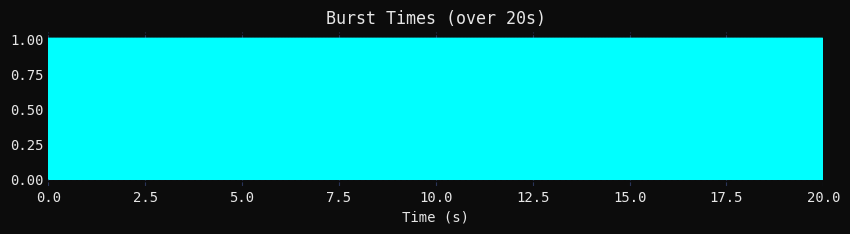

In [7]:
fig, ax = plt.subplots(figsize=(10, 2))
ax.plot(t[0:-1:4], bursts[0:-1:4], color='cyan')
ax.set_xlim(0, 20)
ax.set_xlabel('Time (s)')
ax.set_title('Burst Times (over 20s)')

Text(0.5, 1.0, 'Burst Carrier Frequencies')

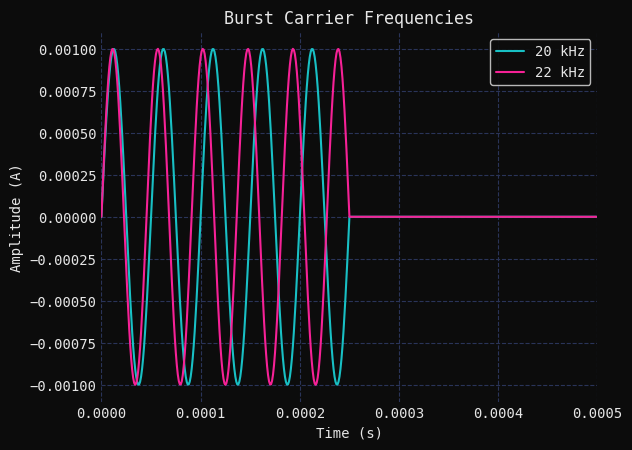

In [8]:
fig, ax = plt.subplots()
ax.plot(t[:int(N/stop * 500e-6)], (signals[:int(N/stop * 500e-6)] * bursts[:int(N/stop * 500e-6)]))
ax.set_xlim(0, 500e-6)
ax.set_ylim(-1.1e-3, 1.1e-3)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude (A)')
ax.legend([f"{int(f/1e3)} kHz" for f in carrier_freqs.flatten()])
ax.set_title('Burst Carrier Frequencies')

Text(0.5, 1.0, 'Signal Interference')

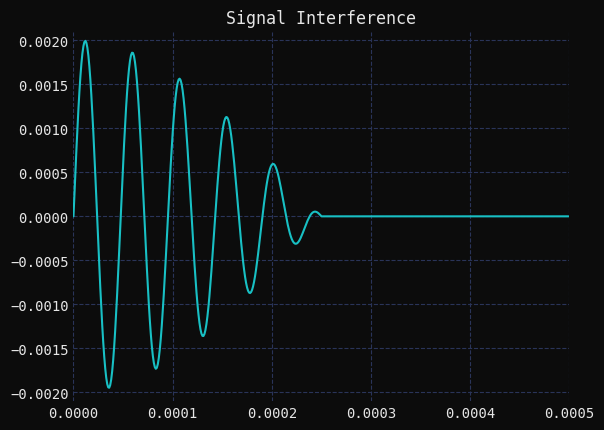

In [9]:
fig, ax = plt.subplots()
ax.plot(t[:int(N/stop * 500e-6)], (signals[:int(N/stop * 500e-6)] * bursts[:int(N/stop * 500e-6)]).sum(axis=1))
ax.set_xlim(0, 500e-6)
ax.set_ylim(-2.1e-3, 2.1e-3)
ax.set_title('Signal Interference')

In [ ]:
# Clear output before pushing to GH!
fig = go.Figure()

fig.add_trace(go.Scatter(x=t.flatten()[0:-1:2], y=(signals * bursts)[0:-1:2,:].sum(axis=1), mode='lines', name=f"{int(carrier_freqs[0]/1e3)} kHz"))

fig.update_layout(
    title="Burst Carrier Frequencies",
    xaxis_title="Time (s)",
    yaxis_title="Amplitude (A)",
    xaxis=dict(range=[0, 1]),
    yaxis=dict(range=[-2.1e-3, 2.1e-3]),
    template="plotly_white",
    legend_title="Carrier Frequency"
)

fig.show()
